# Personal Information
Name: **Carlos Tjoe Nij**

StudentID: **12394467**

Email: [**carlos.tjoeny@student.uva.nl**](carlos.tjoeny@student.uva.nl)

Submitted on: **17.04.2023**

# Data Context

The main dataset that will be used is from https://www.football-data.co.uk/englandm.php. This entity collects match specific data from various betting companies. The dataset contains data for each match in the past 20+ seasons in the Premier League, which ranges from the name of the referee to the amount of home goals scored in a match. The crowd attendance data was collected from https://www.footballwebpages.co.uk/premier-league/attendances. For each season the average crowd size for each club is available. The player valuations data was collected from Transfermarkt - https://www.kaggle.com/datasets/davidcariboo/player-scores 

# Data Description

In [107]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

### Data Loading & merging

In [108]:
# load match data for all seasons

cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Referee', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR']

#s00_01 = pd.read_csv('Data\PL2000_2001.csv', usecols = cols)
s01_02 = pd.read_csv('Data\PL2001_2002.csv', usecols = cols)
s02_03 = pd.read_csv('Data\PL2002_2003.csv', usecols = cols)
  #s03_04 = pd.read_csv('Data\PL2003_2004.csv', usecols = cols)
  #s04_05 = pd.read_csv('Data\PL2004_2005.csv', usecols = cols)
s05_06 = pd.read_csv('Data\PL2005_2006.csv', usecols = cols)
s06_07 = pd.read_csv('Data\PL2006_2007.csv', usecols = cols)
s07_08 = pd.read_csv('Data\PL2007_2008.csv', usecols = cols)
s08_09 = pd.read_csv('Data\PL2008_2009.csv', usecols = cols)
s09_10 = pd.read_csv('Data\PL2009_2010.csv', usecols = cols)
s10_11 = pd.read_csv('Data\PL2010_2011.csv', usecols = cols)
s11_12 = pd.read_csv('Data\PL2011_2012.csv', usecols = cols)
s12_13 = pd.read_csv('Data\PL2012_2013.csv', usecols = cols)
s13_14 = pd.read_csv('Data\PL2013_2014.csv', usecols = cols)
s14_15 = pd.read_csv('Data\PL2014_2015.csv', usecols = cols)
s14_15.dropna(subset=['HomeTeam', 'AwayTeam'], inplace=True)
s15_16 = pd.read_csv('Data\PL2015_2016.csv', usecols = cols)
s16_17 = pd.read_csv('Data\PL2016_2017.csv', usecols = cols)
s17_18 = pd.read_csv('Data\PL2017_2018.csv', usecols = cols)
s18_19 = pd.read_csv('Data\PL2018_2019.csv', usecols = cols)
s19_20 = pd.read_csv('Data\PL2019_2020.csv', usecols = cols)
s20_21 = pd.read_csv('Data\PL2020_2021.csv', usecols = cols)
s21_22 = pd.read_csv('Data\PL2021_2022.csv', usecols = cols)
s22_23 = pd.read_csv('Data\PL2022_2023.csv', usecols = cols)

In [109]:
# Load standings data pre season

stand = pd.read_csv('Data\Standings.csv', usecols =['Season', 'Pos',  'Team'])
stand['Team'] = stand['Team'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield', 
                                                     'Nottingham Forest': "Nott'm Forest"})

stand_02_03 = stand[stand['Season'] == '2001-02']
stand_05_06 = stand[stand['Season'] == '2004-05']
stand_06_07 = stand[stand['Season'] == '2005-06']
stand_07_08 = stand[stand['Season'] == '2006-07']
stand_08_09 = stand[stand['Season'] == '2007-08']
stand_09_10 = stand[stand['Season'] == '2008-09']
stand_10_11 = stand[stand['Season'] == '2009-10']
stand_11_12 = stand[stand['Season'] == '2010-11']
stand_12_13 = stand[stand['Season'] == '2011-12']
stand_13_14 = stand[stand['Season'] == '2012-13']
stand_14_15 = stand[stand['Season'] == '2013-14']
stand_15_16 = stand[stand['Season'] == '2014-15']
stand_16_17 = stand[stand['Season'] == '2015-16']
stand_17_18 = stand[stand['Season'] == '2016-17']
stand_18_19 = stand[stand['Season'] == '2017-18']
stand_19_20 = stand[stand['Season'] == '2018-19']
stand_20_21 = stand[stand['Season'] == '2019-20']
stand_21_22 = stand[stand['Season'] == '2020-21']
stand_22_23 = stand[stand['Season'] == '2021-22']

s01_02 = s01_02.merge(stand_01_02, how='left', left_on=['HomeTeam'], right_on=['Team'])
s01_02.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s01_02 = s01_02.merge(stand_01_02, how='left', left_on=['AwayTeam'], right_on=['Team'])

s02_03 = s02_03.merge(stand_02_03, how='left', left_on=['HomeTeam'], right_on=['Team'])
s02_03.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s02_03 = s02_03.merge(stand_02_03, how='left', left_on=['AwayTeam'], right_on=['Team'])

s05_06 = s05_06.merge(stand_05_06, how='left', left_on=['HomeTeam'], right_on=['Team'])
s05_06.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s05_06 = s05_06.merge(stand_05_06, how='left', left_on=['AwayTeam'], right_on=['Team'])

s06_07 = s06_07.merge(stand_06_07, how='left', left_on=['HomeTeam'], right_on=['Team'])
s06_07.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s06_07 = s06_07.merge(stand_06_07, how='left', left_on=['AwayTeam'], right_on=['Team'])

s07_08 = s07_08.merge(stand_07_08, how='left', left_on=['HomeTeam'], right_on=['Team'])
s07_08.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s07_08 = s07_08.merge(stand_07_08, how='left', left_on=['AwayTeam'], right_on=['Team'])

s08_09 = s08_09.merge(stand_08_09, how='left', left_on=['HomeTeam'], right_on=['Team'])
s08_09.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s08_09 = s08_09.merge(stand_08_09, how='left', left_on=['AwayTeam'], right_on=['Team'])

s09_10 = s09_10.merge(stand_09_10, how='left', left_on=['HomeTeam'], right_on=['Team'])
s09_10.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s09_10 = s09_10.merge(stand_09_10, how='left', left_on=['AwayTeam'], right_on=['Team'])

s10_11 = s10_11.merge(stand_10_11, how='left', left_on=['HomeTeam'], right_on=['Team'])
s10_11.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s10_11 = s10_11.merge(stand_10_11, how='left', left_on=['AwayTeam'], right_on=['Team'])

s11_12 = s11_12.merge(stand_11_12, how='left', left_on=['HomeTeam'], right_on=['Team'])
s11_12.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s11_12 = s11_12.merge(stand_11_12, how='left', left_on=['AwayTeam'], right_on=['Team'])

s12_13 = s12_13.merge(stand_12_13, how='left', left_on=['HomeTeam'], right_on=['Team'])
s12_13.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s12_13 = s12_13.merge(stand_12_13, how='left', left_on=['AwayTeam'], right_on=['Team'])

s13_14 = s13_14.merge(stand_13_14, how='left', left_on=['HomeTeam'], right_on=['Team'])
s13_14.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s13_14 = s13_14.merge(stand_13_14, how='left', left_on=['AwayTeam'], right_on=['Team'])

s14_15 = s14_15.merge(stand_14_15, how='left', left_on=['HomeTeam'], right_on=['Team'])
s14_15.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s14_15 = s14_15.merge(stand_14_15, how='left', left_on=['AwayTeam'], right_on=['Team'])

s15_16 = s15_16.merge(stand_15_16, how='left', left_on=['HomeTeam'], right_on=['Team'])
s15_16.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s15_16 = s15_16.merge(stand_15_16, how='left', left_on=['AwayTeam'], right_on=['Team'])

s16_17 = s16_17.merge(stand_16_17, how='left', left_on=['HomeTeam'], right_on=['Team'])
s16_17.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s16_17 = s16_17.merge(stand_16_17, how='left', left_on=['AwayTeam'], right_on=['Team'])

s17_18 = s17_18.merge(stand_17_18, how='left', left_on=['HomeTeam'], right_on=['Team'])
s17_18.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s17_18 = s17_18.merge(stand_17_18, how='left', left_on=['AwayTeam'], right_on=['Team'])

s18_19 = s18_19.merge(stand_18_19, how='left', left_on=['HomeTeam'], right_on=['Team'])
s18_19.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s18_19 = s18_19.merge(stand_18_19, how='left', left_on=['AwayTeam'], right_on=['Team'])

s19_20 = s19_20.merge(stand_19_20, how='left', left_on=['HomeTeam'], right_on=['Team'])
s19_20.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s19_20 = s19_20.merge(stand_19_20, how='left', left_on=['AwayTeam'], right_on=['Team'])

s20_21 = s20_21.merge(stand_20_21, how='left', left_on=['HomeTeam'], right_on=['Team'])
s20_21.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s20_21 = s20_21.merge(stand_20_21, how='left', left_on=['AwayTeam'], right_on=['Team'])

s21_22 = s21_22.merge(stand_21_22, how='left', left_on=['HomeTeam'], right_on=['Team'])
s21_22.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s21_22 = s21_22.merge(stand_21_22, how='left', left_on=['AwayTeam'], right_on=['Team'])

s22_23 = s22_23.merge(stand_22_23, how='left', left_on=['HomeTeam'], right_on=['Team'])
s22_23.rename(columns={'Pos':'Pos_Home'}, inplace=True)
s22_23 = s22_23.merge(stand_22_23, how='left', left_on=['AwayTeam'], right_on=['Team'])

In [110]:
# load crowd attendance data
a01_02 = pd.read_csv('Data/att_01_02.csv')
a01_02['Unnamed: 1'] = a01_02['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham'})
a02_03 = pd.read_csv('Data/att_02_03.csv')
a02_03['Unnamed: 1'] = a02_03['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom'})
#a03_04 = pd.read_csv('Data/att_03_04.csv')
#a04_05 = pd.read_csv('Data/att_04_05.csv')
a05_06 = pd.read_csv('Data/att_05_06.csv')
a05_06['Unnamed: 1'] = a05_06['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan'})
a06_07 = pd.read_csv('Data/att_06_07.csv')
a06_07['Unnamed: 1'] = a06_07['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn'})
a07_08 = pd.read_csv('Data/att_07_08.csv')
a07_08['Unnamed: 1'] = a07_08['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn',
                                                    'Stoke City': 'Stoke'})
a08_09 = pd.read_csv('Data/att_08_09.csv')
a08_09['Unnamed: 1'] = a08_09['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke'})
a09_10 = pd.read_csv('Data/att_09_10.csv')
a09_10['Unnamed: 1'] = a09_10['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves'})
a10_11 = pd.read_csv('Data/att_10_11.csv')
a10_11['Unnamed: 1'] = a10_11['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves'})
a11_12 = pd.read_csv('Data/att_11_12.csv')
a11_12['Unnamed: 1'] = a11_12['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea'})
a12_13 = pd.read_csv('Data/att_12_13.csv')
a12_13['Unnamed: 1'] = a12_13['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea'})
a13_14 = pd.read_csv('Data/att_13_14.csv')
a13_14['Unnamed: 1'] = a13_14['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff'})
a14_15 = pd.read_csv('Data/att_14_15.csv')
a14_15['Unnamed: 1'] = a14_15['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff'})
a15_16 = pd.read_csv('Data/att_15_16.csv')
a15_16['Unnamed: 1'] = a15_16['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth'})
a16_17 = pd.read_csv('Data/att_16_17.csv')
a16_17['Unnamed: 1'] = a16_17['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth'})
a17_18 = pd.read_csv('Data/att_17_18.csv')
a17_18['Unnamed: 1'] = a17_18['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield'})
a18_19 = pd.read_csv('Data/att_18_19.csv')
a18_19['Unnamed: 1'] = a18_19['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield'})
a19_20 = pd.read_csv('Data/att_19_20.csv')
a19_20['Unnamed: 1'] = a19_20['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield'})
#a20_21 = pd.read_csv('Data/att_20_21.csv')
a21_22 = pd.read_csv('Data/att_21_22.csv')
a21_22['Unnamed: 1'] = a21_22['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield'})
a22_23 = pd.read_csv('Data/att_22_23.csv')
a22_23['Unnamed: 1'] = a22_23['Unnamed: 1'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'AFC Bournemouth': 'Bournemouth',
                                                    'Brighton & Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield', 
                                                     'Nottingham Forest': "Nott'm Forest"})

In [111]:
# merge match data with crowd attendance data

merg_01_02 = s01_02.merge(a01_02[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_02_03 = s02_03.merge(a02_03[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
#merg_03_04 = s03_04.merge(a03_04[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
#merg_04_05 = s04_05.merge(a04_05[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_05_06 = s05_06.merge(a05_06[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_06_07 = s06_07.merge(a06_07[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_07_08 = s07_08.merge(a07_08[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_08_09 = s08_09.merge(a08_09[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_09_10 = s09_10.merge(a09_10[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_10_11 = s10_11.merge(a10_11[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_11_12 = s11_12.merge(a11_12[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_12_13 = s12_13.merge(a12_13[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_13_14 = s13_14.merge(a13_14[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_14_15 = s14_15.merge(a14_15[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_15_16 = s15_16.merge(a15_16[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_16_17 = s16_17.merge(a16_17[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_17_18 = s17_18.merge(a17_18[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_18_19 = s18_19.merge(a18_19[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_19_20 = s19_20.merge(a19_20[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_20_21 = s20_21
merg_21_22 = s21_22.merge(a21_22[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)
merg_22_23 = s22_23.merge(a22_23[['Unnamed: 1', 'Average Attendance']], left_on='HomeTeam', right_on='Unnamed: 1').drop(['Unnamed: 1'], axis=1)

In [112]:
# no attendance during Covid season, so fill missing values with 0
merg_21_22['Average Attendance'] = 0

In [114]:
# combine all seasons into 1 dataframe
all_seasons = pd.concat([merg_01_02, merg_02_03, merg_05_06, 
                         merg_06_07, merg_07_08, merg_08_09, merg_09_10, merg_10_11, 
                         merg_11_12, merg_12_13, merg_13_14, merg_14_15, merg_15_16, 
                         merg_16_17, merg_17_18, merg_18_19, merg_19_20, 
                         merg_22_23])
all_seasons['Average Attendance'] = all_seasons['Average Attendance'].str.replace(',', '').astype(int)

# compute combined position of the teams per match
all_seasons.drop(['Season_x', 'Team_x', 'Season_y', 'Team_y',], axis=1, inplace=True)
all_seasons.rename(columns={'Pos':'Pos_Away'}, inplace=True)
all_seasons['Pos_combined'] = all_seasons['Pos_Home'] + all_seasons['Pos_Away']

In [115]:
# load club data
clubs = pd.read_csv('Data/tm_clubs.csv')
clubs_pl = clubs[clubs['domestic_competition_id']== 'GB1']

# load individual player value data
valu = pd.read_csv('Data/tm_player_valuations.csv')
valu_pl = valu[valu['player_club_domestic_competition_id']== 'GB1']

merg_val = valu_pl.merge(clubs_pl[['name', 'club_id']], left_on='current_club_id', right_on='club_id')

# compute average player value per year for each club 
merg_val['date'] = pd.to_datetime(merg_val['date'])

result = merg_val.groupby([merg_val['name'], merg_val['date'].dt.year])['market_value_in_eur'].mean().reset_index()
result = result.rename(columns={'market_value_in_eur': 'average_market_value_in_eur', 'date':'year'})

result['name'] = result['name'].replace({'Manchester United': 'Man United', 'Newcastle United': 'Newcastle',
                                                    'Charlton Athletic': 'Charlton', 'Derby County': 'Derby',
                                                    'Leeds United': 'Leeds', 'Leicester City': 'Leicester',
                                                    'Tottenham Hotspur': 'Tottenham', 'Bolton Wanderers': 'Bolton',
                                                    'Ipswich Town': 'Ipswich', 'Blackburn Rovers': 'Blackburn',
                                                    'West Ham United': 'West Ham', 'Birmingham City': 'Birmingham',
                                                    'Manchester City': 'Man City', 'West Bromwich Albion': 'West Brom',
                                                    'Wigan Athletic': 'Wigan', 'Blackburn Rovers': 'Blackburn', 
                                                    'Hull City': 'Hull', 'Stoke City': 'Stoke', 
                                                    'Wolverhampton Wanderers': 'Wolves', 'Norwich City': 'Norwich',
                                                    'Queens Park Rangers': 'QPR', 'Swansea City': 'Swansea',
                                                    'Cardiff City': 'Cardiff', 'Afc Bournemouth': 'Bournemouth',
                                                    'Brighton Amp Hove Albion': 'Brighton', 
                                                     'Huddersfield Town': 'Huddersfield', 'Fc Arsenal': 'Arsenal',
                                        'Fc Brentford': 'Brentford', 'Fc Burnley': 'Burnley', 'Fc Chelsea': 'Chelsea',
                                        'Fc Everton': 'Everton', 'Fc Fulham': 'Fulham', 'Fc Liverpool': 'Liverpool',
                                        'Fc Middlesbrough': 'Middlesbrough', 'Fc Reading': 'Reading', 
                                        'Fc Southampton': 'Southampton', 'Fc Watford': 'Watford'})

result['average_market_value_in_eur'] = result['average_market_value_in_eur'].astype(int)
#result

In [116]:
# Format the year
all_seasons['Date'] = all_seasons['Date'].apply(lambda x: '20' + x[-2:] if len(x[-2:])==2 else x)
all_seasons['Date'] = all_seasons['Date'].astype(int)
all_seasons.rename(columns={'Date':'Year'}, inplace=True)

In [117]:
# Add the average player value of the home and away teams
merged_df = all_seasons.merge(result, how='left', left_on=['Year', 'HomeTeam'], right_on=['year', 'name'])
merged_df.drop(['name', 'year'], axis=1, inplace=True)
merged_df.rename(columns={'average_market_value_in_eur':'market_value_home'}, inplace=True)

merged_all = merged_df.merge(result, how='left', left_on=['Year', 'AwayTeam'], right_on=['year', 'name'])
merged_all.drop(['name', 'year'], axis=1, inplace=True)
merged_all.rename(columns={'average_market_value_in_eur':'market_value_away'}, inplace=True)

In [118]:
# compute the total average player value of both teams
final = merged_all
final['Total_value'] = final['market_value_home'] + final['market_value_away']

### Analysis 1: Individual referee behaviour
First, each referee who officiated more than 15 matches from the last 20+ years are analysed. The chart shows that M. Riley gives the most fouls per match on average, and only a few referees give more home than away fouls.
The second graph shows the yellow cards given by each referee. The home and away difference is bigger for yellow cards than fouls given.

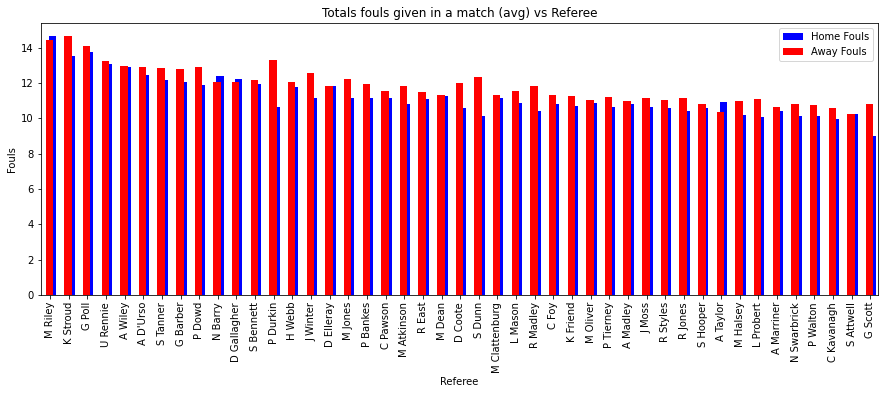

In [83]:
# plot the totals fouls given in a match (avg) per referee

referee_data = all_seasons.groupby('Referee')[['HF', 'AF']].mean().reset_index()

# only take referees who did more than 15 matches
referee_counts = all_seasons['Referee'].value_counts()
referee_data = referee_data[referee_data['Referee'].isin(referee_counts[referee_counts > 15].index)]

referee_data['Total Fouls'] = referee_data['HF'] + referee_data['AF']
referee_data = referee_data.sort_values(by='Total Fouls', ascending=False)

fig, ax = plt.subplots(figsize=(15,5))

referee_data.plot(kind='bar', x='Referee', y='HF', position=0.2, width=0.4, color='blue', ax=ax, label='Home Fouls')
referee_data.plot(kind='bar', x='Referee', y='AF', position=0.6, width=0.4, color='red', ax=ax, label='Away Fouls')

plt.xlabel('Referee')
plt.ylabel('Fouls')
plt.title('Totals fouls given in a match (avg) vs Referee')
plt.legend()
plt.show()

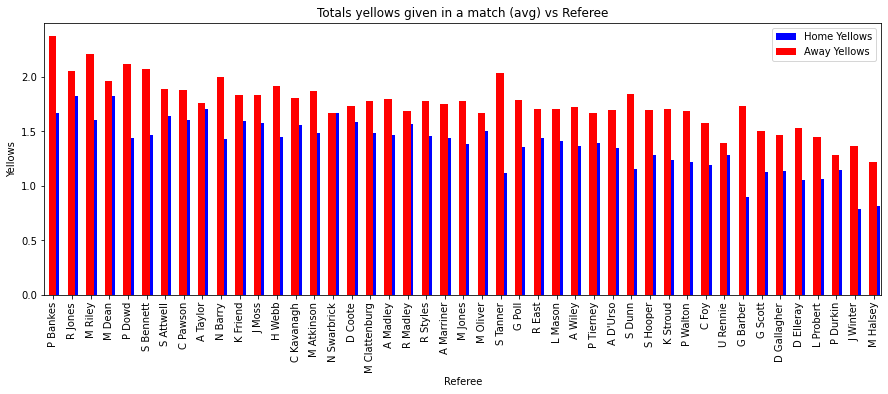

In [14]:
referee_data_y = all_seasons.groupby('Referee')[['HY', 'AY']].mean().reset_index()

referee_counts = all_seasons['Referee'].value_counts()
referee_data_y = referee_data_y[referee_data_y['Referee'].isin(referee_counts[referee_counts > 15].index)]

referee_data_y['Total Yellows'] = referee_data_y['HY'] + referee_data_y['AY']
referee_data_y = referee_data_y.sort_values(by='Total Yellows', ascending=False)

fig, ax = plt.subplots(figsize=(15,5))

referee_data_y.plot(kind='bar', x='Referee', y='HY', position=0.2, width=0.4, color='blue', ax=ax, label='Home Yellows')
referee_data_y.plot(kind='bar', x='Referee', y='AY', position=0.6, width=0.4, color='red', ax=ax, label='Away Yellows')

plt.xlabel('Referee')
plt.ylabel('Yellows')
plt.title('Totals yellows given in a match (avg) vs Referee')
plt.legend()
plt.show()

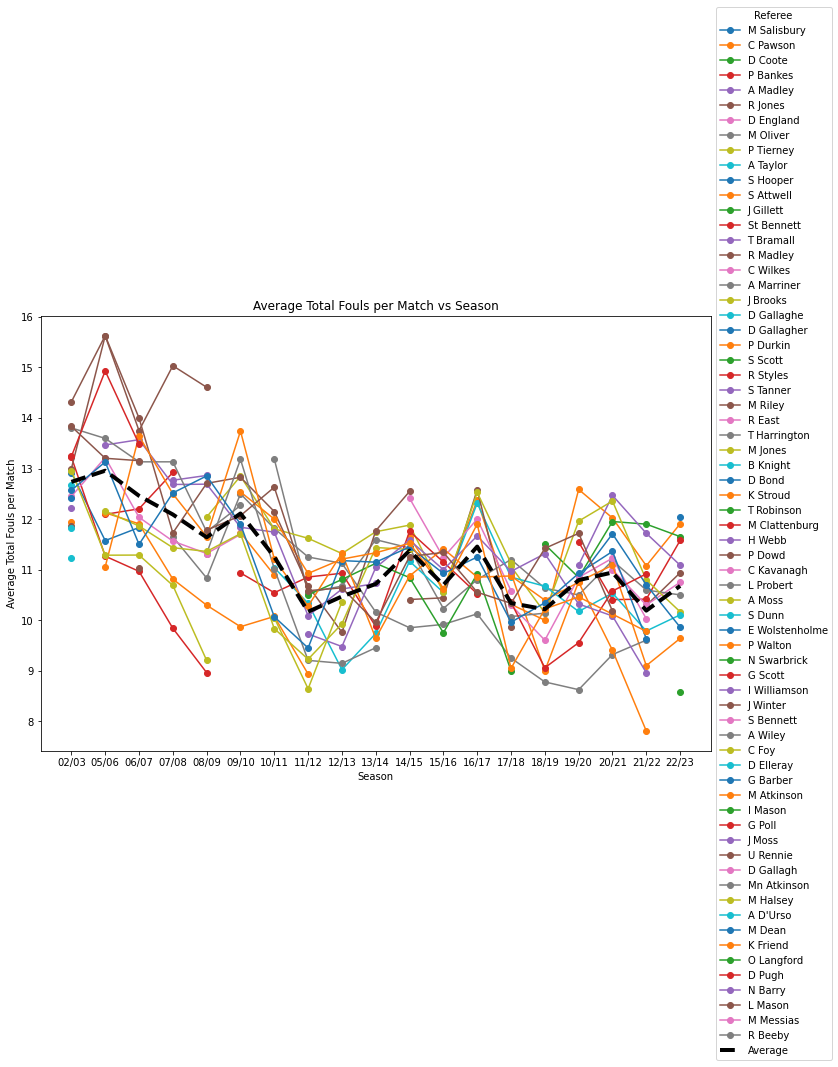

In [65]:
# Fouls vs ref
seasons = [merg_02_03, merg_05_06, merg_06_07, merg_07_08, merg_08_09, merg_09_10, merg_10_11, merg_11_12, merg_12_13, merg_13_14, merg_14_15, merg_15_16, merg_16_17, merg_17_18, merg_18_19, merg_19_20, merg_20_21, merg_21_22, merg_22_23]
season_names = ['02/03', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23']

referee_season_avg_fouls = {}

for season, season_name in zip(seasons, season_names):
    # count appearances referees in season
    referee_counts = season['Referee'].value_counts()
    
    # refs with more than 10 apps
    qualified_referees = referee_counts[referee_counts > 10].index
    
    # average total fouls per match
    season_referee_avg_fouls = season[season['Referee'].isin(qualified_referees)].groupby('Referee')[['HF', 'AF']].mean()
    season_referee_avg_fouls['Avg Fouls'] = (season_referee_avg_fouls['HF'] + season_referee_avg_fouls['AF']) / 2
    referee_season_avg_fouls[season_name] = season_referee_avg_fouls['Avg Fouls']

# distinct referees
distinct_referees = set().union(*[list(season_data['Referee'].unique()) for season_data in seasons])

referee_data = pd.DataFrame(index=distinct_referees, columns=season_names)
for season_name, season_avg_fouls in referee_season_avg_fouls.items():
    referee_data[season_name] = season_avg_fouls

# sort by the average total fouls per match in the last season
referee_data.sort_values(by=season_names[-1], ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

for referee in referee_data.index:
    ax.plot(season_names, referee_data.loc[referee], marker='o', label=referee)

# Calculate average fouls per season
average_fouls_per_season = referee_data.mean()
ax.plot(season_names, average_fouls_per_season, color='black', linestyle='dashed', linewidth=4, label='Average')

plt.xlabel('Season')
plt.ylabel('Average Total Fouls per Match')
plt.title('Average Total Fouls per Match vs Season')
plt.legend(title='Referee', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

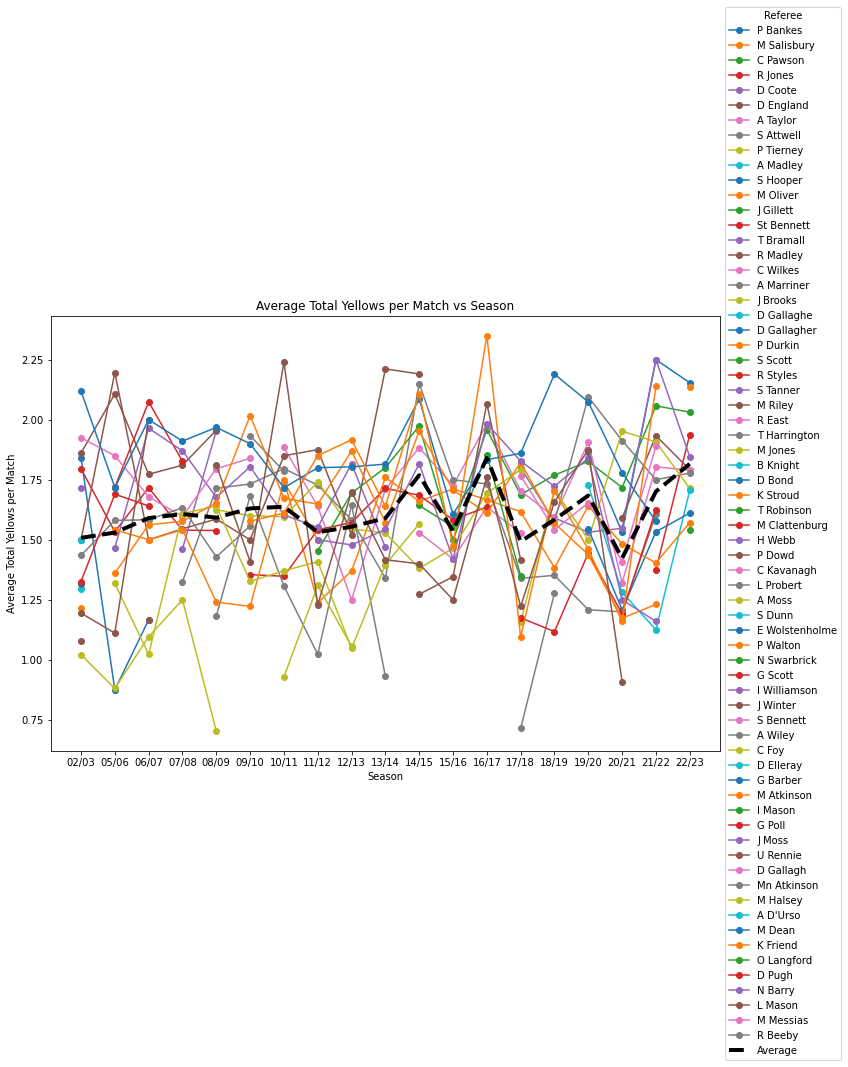

In [62]:
# Yellows vs ref

seasons = [merg_02_03, merg_05_06, merg_06_07, merg_07_08, merg_08_09, merg_09_10, merg_10_11, merg_11_12, merg_12_13, merg_13_14, merg_14_15, merg_15_16, merg_16_17, merg_17_18, merg_18_19, merg_19_20, merg_20_21, merg_21_22, merg_22_23]
season_names = ['02/03', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23']

referee_season_avg_yellows = {}

for season, season_name in zip(seasons, season_names):
    # count appearances referees in season
    referee_counts = season['Referee'].value_counts()
    
    # refs with more than 10 apps
    qualified_referees = referee_counts[referee_counts > 10].index
    
    # average total yellows per match
    season_referee_avg_y = season[season['Referee'].isin(qualified_referees)].groupby('Referee')[['HY', 'AY']].mean()
    season_referee_avg_y['Avg Yellows'] = (season_referee_avg_y['HY'] + season_referee_avg_y['AY']) / 2
    referee_season_avg_yellows[season_name] = season_referee_avg_y['Avg Yellows']

# distinct referees
distinct_referees = set().union(*[list(season_data['Referee'].unique()) for season_data in seasons])

referee_data = pd.DataFrame(index=distinct_referees, columns=season_names)
for season_name, season_avg_y in referee_season_avg_yellows.items():
    referee_data[season_name] = season_avg_y

# sort by the average total fouls per match in the last season
referee_data.sort_values(by=season_names[-1], ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

for referee in referee_data.index:
    ax.plot(season_names, referee_data.loc[referee], marker='o', label=referee)
    
# Calculate average fouls per season
average_yellows_per_season = referee_data.mean()
ax.plot(season_names, average_yellows_per_season, color='black', linestyle='dashed', linewidth=4, label='Average')

plt.xlabel('Season')
plt.ylabel('Average Total Yellows per Match')
plt.title('Average Total Yellows per Match vs Season')
plt.legend(title='Referee', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [84]:
#
average_total_fouls = referee_data['Total Fouls'].mean()
lowest_total_fouls = referee_data['Total Fouls'].min()
lowest_referee = referee_data.loc[referee_data['Total Fouls'] == lowest_total_fouls, 'Referee'].values[0]
highest_total_fouls = referee_data['Total Fouls'].max()
highest_referee = referee_data.loc[referee_data['Total Fouls'] == highest_total_fouls, 'Referee'].values[0]
std_deviation = referee_data['Total Fouls'].std()

# Create the table
table_data = [
    ['Average Total Fouls', average_total_fouls],
    ['Lowest Total Fouls', lowest_total_fouls, lowest_referee],
    ['Highest Total Fouls', highest_total_fouls, highest_referee],
    ['Standard Deviation', std_deviation]
]

table_columns = ['Statistic', 'Value', 'Referee']

# Display the table
table = pd.DataFrame(table_data, columns=table_columns)
table.set_index('Statistic', inplace=True)
table

,Value,Referee
Statistic,,
Average Total Fouls,23.061587,None
Lowest Total Fouls,19.835616,G Scott
Highest Total Fouls,29.100000,M Riley
Standard Deviation,2.082723,None


### Analysis 2: Referee behaviour vs crowd attendance 
In this analysis we look at the average crowd attendance and the behaviour of the referee. The first 2 plots shows a slight negative correlation between the crowd attendance and the number of fouls given, which is the same for yellow cards. 
The last plot shows the average number of yellow cards given per match of the past seasons. The difference between home and away yellow cards was the lowest in the season 2020/2021, which is also the covid season which inlcuded no fans in the stadiums.

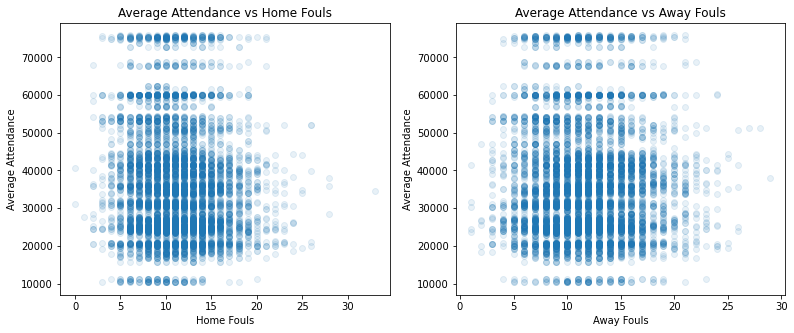

In [17]:
# Fouls against crowd attendance
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

axs[0].scatter(all_seasons['HF'], all_seasons['Average Attendance'], alpha=0.1)
axs[0].set_title('Average Attendance vs Home Fouls')
axs[0].set_xlabel('Home Fouls')
axs[0].set_ylabel('Average Attendance')

axs[1].scatter(all_seasons['AF'], all_seasons['Average Attendance'], alpha=0.1)
axs[1].set_title('Average Attendance vs Away Fouls')
axs[1].set_xlabel('Away Fouls')
axs[1].set_ylabel('Average Attendance')

plt.show()


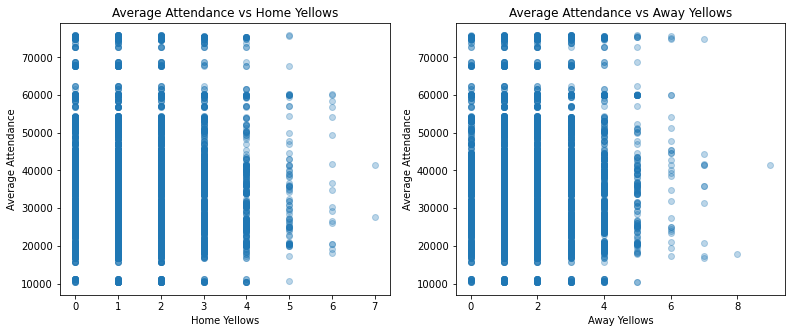

In [18]:
# Yellow cards against crowd attendance
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

axs[0].scatter(all_seasons['HY'], all_seasons['Average Attendance'], alpha=0.3)
axs[0].set_title('Average Attendance vs Home Yellows')
axs[0].set_xlabel('Home Yellows')
axs[0].set_ylabel('Average Attendance')

axs[1].scatter(all_seasons['AY'], all_seasons['Average Attendance'], alpha=0.3)
axs[1].set_title('Average Attendance vs Away Yellows')
axs[1].set_xlabel('Away Yellows')
axs[1].set_ylabel('Average Attendance')

plt.show()

In [70]:
# plot the average yellow cards per match, pre season

import plotly.graph_objs as go
F = {'Home Yellows': [merg_01_02['HY'].mean(), merg_02_03['HY'].mean(), merg_05_06['HY'].mean(), merg_06_07['HY'].mean(), merg_07_08['HY'].mean(), merg_08_09['HY'].mean(), merg_09_10['HY'].mean(), merg_10_11['HY'].mean(), merg_11_12['HY'].mean(), merg_12_13['HY'].mean(), merg_13_14['HY'].mean(), merg_14_15['HY'].mean(), merg_15_16['HY'].mean(), merg_16_17['HY'].mean(), merg_17_18['HY'].mean(), merg_18_19['HY'].mean(), merg_19_20['HY'].mean(), merg_20_21['HY'].mean(), merg_21_22['HY'].mean(), merg_22_23['HY'].mean()],
'Away Yellows': [merg_01_02['AY'].mean(), merg_02_03['AY'].mean(), merg_05_06['AY'].mean(), merg_06_07['AY'].mean(), merg_07_08['AY'].mean(), merg_08_09['AY'].mean(), merg_09_10['AY'].mean(), merg_10_11['AY'].mean(), merg_11_12['AY'].mean(), merg_12_13['AY'].mean(), merg_13_14['AY'].mean(), merg_14_15['AY'].mean(), merg_15_16['AY'].mean(), merg_16_17['AY'].mean(), merg_17_18['AY'].mean(), merg_18_19['AY'].mean(), merg_19_20['AY'].mean(), merg_20_21['AY'].mean(), merg_21_22['AY'].mean(), merg_22_23['AY'].mean()]}

df3 = pd.DataFrame(F, index=['01/02', '02/03', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'])

fig3 = go.Figure()

fig3.add_trace(go.Scatter(
x=df3.index,
y=df3['Home Yellows'],
name='Home Yellows',
mode="lines+markers+text",
text=df3['Home Yellows'].round(2),
textposition="bottom center",
line_color='#c2bf0c',
line=dict(width=5)
))

fig3.add_trace(go.Scatter(
x=df3.index,
y=df3['Away Yellows'],
name='Away Yellows',
mode="lines+markers+text",
text=df3['Away Yellows'].round(2),
textposition="top center",
line_color='#ebe97c',
line=dict(width=5)
))

fig3.update_xaxes(
title_text = "Season"
)

fig3.update_yaxes(
title_text = "Yellow cards per match (avg)"
)

fig3.show()

![PlotCards](Data/ss1.jpg)

In [71]:
# red cards

F = {'Home Reds': [merg_01_02['HR'].mean(), merg_02_03['HR'].mean(), merg_05_06['HR'].mean(), merg_06_07['HR'].mean(), merg_07_08['HR'].mean(), merg_08_09['HR'].mean(), merg_09_10['HR'].mean(), merg_10_11['HR'].mean(), merg_11_12['HR'].mean(), merg_12_13['HR'].mean(), merg_13_14['HR'].mean(), merg_14_15['HR'].mean(), merg_15_16['HR'].mean(), merg_16_17['HR'].mean(), merg_17_18['HR'].mean(), merg_18_19['HR'].mean(), merg_19_20['HR'].mean(), merg_20_21['HR'].mean(), merg_21_22['HR'].mean(), merg_22_23['HR'].mean()],
'Away Reds': [merg_01_02['AR'].mean(), merg_02_03['AR'].mean(), merg_05_06['AR'].mean(), merg_06_07['AR'].mean(), merg_07_08['AR'].mean(), merg_08_09['AR'].mean(), merg_09_10['AR'].mean(), merg_10_11['AR'].mean(), merg_11_12['AR'].mean(), merg_12_13['AR'].mean(), merg_13_14['AR'].mean(), merg_14_15['AR'].mean(), merg_15_16['AR'].mean(), merg_16_17['AR'].mean(), merg_17_18['AR'].mean(), merg_18_19['AR'].mean(), merg_19_20['AR'].mean(), merg_20_21['AR'].mean(), merg_21_22['AR'].mean(), merg_22_23['AR'].mean()]}

df3 = pd.DataFrame(F, index=['01/02', '02/03', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'])

fig3 = go.Figure()

fig3.add_trace(go.Scatter(
x=df3.index,
y=df3['Home Reds'],
name='Home Reds',
mode="lines+markers+text",
text=df3['Home Reds'].round(2),
textposition="bottom center",
line_color='#a11010',
line=dict(width=5)
))

fig3.add_trace(go.Scatter(
x=df3.index,
y=df3['Away Reds'],
name='Away Reds',
mode="lines+markers+text",
text=df3['Away Reds'].round(2),
textposition="top center",
line_color='#fc5656',
line=dict(width=5)
))

fig3.update_xaxes(
title_text = "Season"
)

fig3.update_yaxes(
title_text = "Red cards per match (avg)"
)

fig3.show()


![PlotCards](Data/ss2.jpg)

In [39]:
# home fouls per team

seasons = [merg_01_02, merg_02_03, merg_05_06, merg_06_07, merg_07_08, merg_08_09, merg_09_10, merg_10_11, merg_11_12, merg_12_13, merg_13_14, merg_14_15, merg_15_16, merg_16_17, merg_17_18, merg_18_19, merg_19_20, merg_20_21, merg_21_22, merg_22_23]
teams = []

for season in seasons:
    teams.extend(season['HomeTeam'].unique())

teams = list(set(teams))

fig4 = go.Figure()

for team in teams:
    home_fouls = []
    for season in seasons:
        home_fouls.append(season.loc[season['HomeTeam'] == team, 'HF'].mean())
    
    fig4.add_trace(go.Scatter(
        x=df3.index,
        y=home_fouls,
        name=team,
        mode="lines+markers",
        line=dict(width=2)
    ))

    
average_fouls = []
for season in seasons:
    season_avg = season['HF'].mean()
    average_fouls.append(season_avg)

fig4.add_trace(go.Scatter(
    x=df3.index,
    y=average_fouls,
    name='Average',
    mode="lines",
    line_color='black',
    line=dict(width=4)
))

fig4.update_xaxes(
    title_text="Season"
)

fig4.update_yaxes(
    title_text="Fouls per match (avg)"
)

fig4.show()

![PlotCards](Data/ss3.jpg)

In [45]:
# away fouls per team
teams = []

for season in seasons:
    teams.extend(season['HomeTeam'].unique())

teams = list(set(teams))

fig4 = go.Figure()

for team in teams:
    away_fouls = []
    for season in seasons:
        away_fouls.append(season.loc[season['HomeTeam'] == team, 'AF'].mean())
    
    fig4.add_trace(go.Scatter(
        x=df3.index,
        y=away_fouls,
        name=team,
        mode="lines+markers",
        line=dict(width=2)
    ))

average_fouls = []
for season in seasons:
    season_avg = season['AF'].mean()
    average_fouls.append(season_avg)

fig4.add_trace(go.Scatter(
    x=df3.index,
    y=average_fouls,
    name='Average',
    mode="lines",
    line_color='black',
    line=dict(width=4)
))

fig4.update_xaxes(
    title_text="Season"
)

fig4.update_yaxes(
    title_text="Fouls per match (avg)"
)

fig4.show()


![PlotCards](Data/ss4.jpg)

### Analysis 3: Referee behaviour vs team value:
This analysis looks at the team's average player value and the behaviour of the referee. A slight negative correlation between the value and number of fouls and yellow cards is visible. This correlation is slightly bigger when only taking the home team value into consideration.

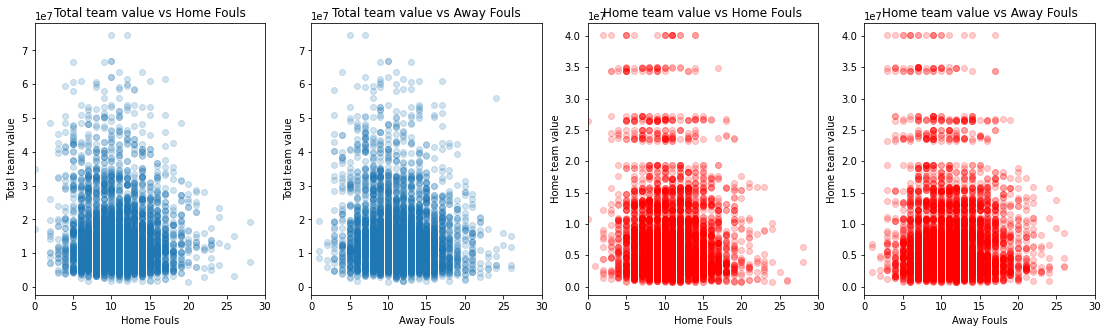

In [17]:
# Hf en Home value is goeie
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(19,5))

axs[0].scatter(final['HF'], final['Total_value'], alpha=0.2)
axs[0].set_title('Total team value vs Home Fouls')
axs[0].set_xlabel('Home Fouls')
axs[0].set_ylabel('Total team value')
axs[0].set_xlim(0, 30)

axs[1].scatter(final['AF'], final['Total_value'], alpha=0.2)
axs[1].set_title('Total team value vs Away Fouls')
axs[1].set_xlabel('Away Fouls')
axs[1].set_ylabel('Total team value')
axs[1].set_xlim(0, 30)

axs[2].scatter(final['HF'], final['market_value_home'], alpha=0.2, c='r')
axs[2].set_title('Home team value vs Home Fouls')
axs[2].set_xlabel('Home Fouls')
axs[2].set_ylabel('Home team value')
axs[2].set_xlim(0, 30)

axs[3].scatter(final['AF'], final['market_value_home'], alpha=0.2, c='r')
axs[3].set_title('Home team value vs Away Fouls')
axs[3].set_xlabel('Away Fouls')
axs[3].set_ylabel('Home team value')
axs[3].set_xlim(0, 30)

plt.show()

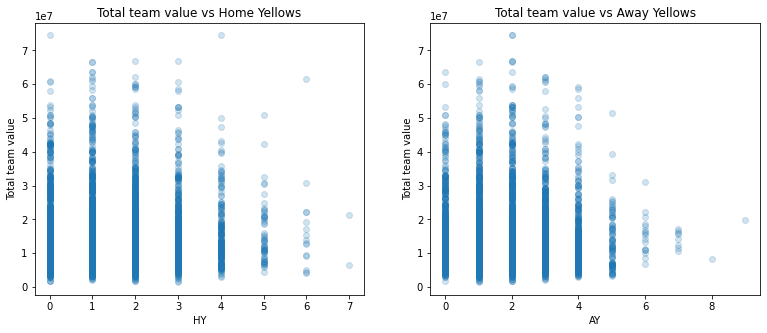

In [18]:
# 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

axs[0].scatter(final['HY'], final['Total_value'], alpha=0.2)
axs[0].set_title('Total team value vs Home Yellows')
axs[0].set_xlabel('HY')
axs[0].set_ylabel('Total team value')

axs[1].scatter(final['AY'], final['Total_value'], alpha=0.2)
axs[1].set_title('Total team value vs Away Yellows')
axs[1].set_xlabel('AY')
axs[1].set_ylabel('Total team value')

plt.show()

### Analysis 2: Referee behaviour vs club position
The plot analyses the combined position in the league of both clubs during a match, against the number of fouls in a match.

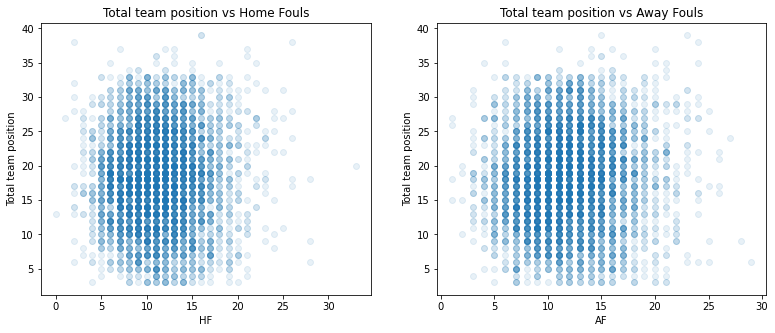

In [119]:
# 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

axs[0].scatter(final['HF'], final['Pos_combined'], alpha=0.1)
axs[0].set_title('Total team position vs Home Fouls')
axs[0].set_xlabel('HF')
axs[0].set_ylabel('Total team position')

axs[1].scatter(final['AF'], final['Pos_combined'], alpha=0.1)
axs[1].set_title('Total team position vs Away Fouls')
axs[1].set_xlabel('AF')
axs[1].set_ylabel('Total team position')

plt.show()

### Machine Learning

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [175]:
final['total_fouls'] = final['HF'] + final['AF']
final['total_cards'] = final['HY'] + final['AY']

final['diff_fouls'] = final['AF'] - final['HF']
final['diff_cards'] = final['AY'] - final['HY']

In [177]:
# predicting cards

features = ['Pos_combined', 'Average Attendance', 'Total_value']
targets = ['total_cards', 'diff_cards']

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

for target in targets:
    print(f"\nTarget: {target}")
    
    for feature in features:
        print(f"\nFeature: {feature}")
        
        data = final[[feature, target]]
        # drop rows with missing values
        data = data.dropna()
        
        # split the data into features and target
        X = data[[feature]]
        y = data[target]
        
        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # train and evaluate each model
        results = {}
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            results[model_name] = rmse
        
        # select model with the lowest RMSE
        best_model = min(results, key=results.get)
        best_rmse = results[best_model]
        
        print("Results:")
        for model, rmse in results.items():
            print(f"{model}: RMSE = {rmse}")
        
        print("Best Model:")
        print(f"{best_model}: RMSE = {best_rmse}")



Target: total_cards

Feature: Pos_combined
Results:
Linear Regression: RMSE = 1.885760434904614
Random Forest Regressor: RMSE = 1.8795526708784192
Gradient Boosting Regressor: RMSE = 1.8790718651299614
Best Model:
Gradient Boosting Regressor: RMSE = 1.8790718651299614

Feature: Average Attendance
Results:
Linear Regression: RMSE = 1.857951968068423
Random Forest Regressor: RMSE = 1.883643542497451
Gradient Boosting Regressor: RMSE = 1.8522197034888788
Best Model:
Gradient Boosting Regressor: RMSE = 1.8522197034888788

Feature: Total_value
Results:
Linear Regression: RMSE = 1.876300200245703
Random Forest Regressor: RMSE = 2.2670370720294546
Gradient Boosting Regressor: RMSE = 1.8981191123012753
Best Model:
Linear Regression: RMSE = 1.876300200245703

Target: diff_cards

Feature: Pos_combined
Results:
Linear Regression: RMSE = 1.6435920946328384
Random Forest Regressor: RMSE = 1.6553830354501378
Gradient Boosting Regressor: RMSE = 1.6529336993683357
Best Model:
Linear Regression: RMSE 

In [178]:
# predicting fouls

features = ['Pos_combined', 'Average Attendance', 'Total_value']
targets = ['total_fouls', 'diff_fouls']

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

for target in targets:
    print(f"\nTarget: {target}")
    
    for feature in features:
        print(f"\nFeature: {feature}")
        
        data = final[[feature, target]]
        # drop rows with missing values
        data = data.dropna()
        
        # split the data into features and target
        X = data[[feature]]
        y = data[target]
        
        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # train and evaluate each model
        results = {}
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            results[model_name] = rmse
        
        # select model with the lowest RMSE
        best_model = min(results, key=results.get)
        best_rmse = results[best_model]
        
        print("Results:")
        for model, rmse in results.items():
            print(f"{model}: RMSE = {rmse}")
        
        print("Best Model:")
        print(f"{best_model}: RMSE = {best_rmse}")


Target: total_fouls

Feature: Pos_combined
Results:
Linear Regression: RMSE = 5.800514999283905
Random Forest Regressor: RMSE = 5.818835841968274
Gradient Boosting Regressor: RMSE = 5.815262948321124
Best Model:
Linear Regression: RMSE = 5.800514999283905

Feature: Average Attendance
Results:
Linear Regression: RMSE = 5.812232364445392
Random Forest Regressor: RMSE = 5.500735933469551
Gradient Boosting Regressor: RMSE = 5.573833594629105
Best Model:
Random Forest Regressor: RMSE = 5.500735933469551

Feature: Total_value
Results:
Linear Regression: RMSE = 5.438772634945756
Random Forest Regressor: RMSE = 6.208802333100603
Gradient Boosting Regressor: RMSE = 5.4559515929880416
Best Model:
Linear Regression: RMSE = 5.438772634945756

Target: diff_fouls

Feature: Pos_combined
Results:
Linear Regression: RMSE = 4.91788746237177
Random Forest Regressor: RMSE = 4.943392074547134
Gradient Boosting Regressor: RMSE = 4.941165463406477
Best Model:
Linear Regression: RMSE = 4.91788746237177

Feat